## Goal:

The goal of collection this dataset is to analyze it using classification and clustering on the input parameters like gender, age, various diseases, and smoking status in order to predict the likelihood of an individual suffering from a stroke.

## Dataset:

https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

In [157]:
data<-read.csv("./Dataset/healthcare-dataset-stroke-data.csv")

## Genral info about the dataset:
Among the 5110 objects in our dataset sample, 12 attributes are used to describe them.
Our characteristics' values are utilized to identify their types, such as the nominal for id, binary for gender, and numeric for age.  
Additionally, we had two attributes for hypertension and heart disease that took two values 1 and 0 to indicate whether they are sufferd from it or not, respectively. The last attribute, **"stroke"**, was described by two values 0 and 1 for the possibility of having a stroke or not as a result of analysis of the previous data, , which is what we aim to train our model to predict.


## Data

<table>
<tr>
    <th>Attribute Name</th>
	<th>Description</th>
	<th>Data Type</th> 
	<th>Possible values</th> 
</tr>

<tr>
    <td>id</td> 
    <td>Unique id of the patient</td>
	<td>Nominal</td>
	<td>Range between 67-72940</td>
	
</tr>

<tr>
    <td>gender</td> 
    <td>Gender of the patient</td>
	<td>Binary</td>	
    <td>Female <br> Male</td>   
</tr>

<tr>
    <td>age</td>
    <td>Age of the patient</td>
	<td>Numeric</td>	
    <td>Range between 0.08-82</td>   
</tr>

<tr>
	<td>hypertension</td>
    <td>Hypertension binary feature, 1 means the patient has hypertension, 0 means they do not.</td> 
	<td>Binary</td>
    <td>0,1</td>   
</tr>

<tr>
	<td>heart_disease</td>
    <td>Heart disease binary feature, 1 means the patient has heart disease, 0 means they do not.</td> 
	<td>Binary</td>
    <td>0,1</td>   
</tr>

<tr>
	<td>ever_married</td> 
    <td>Has the patient ever been married?</td> 
	<td>Binary</td>
    <td>Yes <br> No</td>   
</tr>

<tr>
    <td>work_type</td> 
    <td>Work type of the patient</td> 
	<td>Nominal</td>
    <td>"Private" <br> "Self-employed" <br>"children" <br>"Govt_job" <br>"Never_worked"</td>
    
    
    
    
    
</tr>

<tr>
    <td>residence_type</td>
    <td>Residence type of the patient</td> 
	<td>Binary</td>
    <td>"Urban" <br> "Rural"</td>   
</tr>

<tr>
	<td>avg_glucose_level</td>
    <td>Average glucose level in blood</td> 
	<td>Numeric</td>
    <td>Range between 55.1-272</td>   
</tr>

<tr>
	<td>bmi</td>
    <td>Body Mass Index</td> 
	<td>Numeric</td>
    <td> Range between 10.3-97.6 </td>   

</tr>

<tr>
	<td>smoking_status</td>
    <td>Smoking status of the patient</td> 
    <td>Nominal</td>  
	<td>"never smoked" <br> "Unknown" <br> "formerly smoked" <br> "smokes"</td>
	
</tr>

<tr>
	<td>stroke</td>
    <td>Stroke event, 1 means the patient had a stroke, 0 means not</td> 
    <td>Binary</td>  
	<td>0,1</td>
	
</tr>

</table>

In [158]:
str(data)

'data.frame':	5110 obs. of  12 variables:
 $ id               : int  9046 51676 31112 60182 1665 56669 53882 10434 27419 60491 ...
 $ gender           : Factor w/ 3 levels "Female","Male",..: 2 1 2 1 1 2 2 1 1 1 ...
 $ age              : num  67 61 80 49 79 81 74 69 59 78 ...
 $ hypertension     : int  0 0 0 0 1 0 1 0 0 0 ...
 $ heart_disease    : int  1 0 1 0 0 0 1 0 0 0 ...
 $ ever_married     : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 2 2 1 2 2 ...
 $ work_type        : Factor w/ 5 levels "children","Govt_job",..: 4 5 4 4 5 4 4 4 4 4 ...
 $ Residence_type   : Factor w/ 2 levels "Rural","Urban": 2 1 1 2 1 2 1 2 1 2 ...
 $ avg_glucose_level: num  229 202 106 171 174 ...
 $ bmi              : Factor w/ 419 levels "10.3","11.3",..: 240 419 199 218 114 164 148 102 419 116 ...
 $ smoking_status   : Factor w/ 4 levels "formerly smoked",..: 1 2 2 3 2 1 2 2 4 4 ...
 $ stroke           : int  1 1 1 1 1 1 1 1 1 1 ...


In [159]:
#Number of rows
nrow(data)
#Number of column
ncol(data)

[1] 5110

[1] 12

In [160]:
library(tidyverse)
library(lubridate)
library(magrittr)
library(dplyr)
library(tidyr)
library(readr)
library(ggplot2)
library(outliers)
library(caret)

In [161]:
cor(data$age,data$avg_glucose_level)

[1] 0.2381711

In [162]:
library(Hmisc)
describe(data)

ERROR: Error in library(Hmisc): there is no package called 'Hmisc'


In [163]:
#Five number summary:
summary(data)

       id           gender          age         hypertension    
 Min.   :   67   Female:2994   Min.   : 0.08   Min.   :0.00000  
 1st Qu.:17741   Male  :2115   1st Qu.:25.00   1st Qu.:0.00000  
 Median :36932   Other :   1   Median :45.00   Median :0.00000  
 Mean   :36518                 Mean   :43.23   Mean   :0.09746  
 3rd Qu.:54682                 3rd Qu.:61.00   3rd Qu.:0.00000  
 Max.   :72940                 Max.   :82.00   Max.   :1.00000  
                                                                
 heart_disease     ever_married         work_type    Residence_type
 Min.   :0.00000   No :1757     children     : 687   Rural:2514    
 1st Qu.:0.00000   Yes:3353     Govt_job     : 657   Urban:2596    
 Median :0.00000                Never_worked :  22                 
 Mean   :0.05401                Private      :2925                 
 3rd Qu.:0.00000                Self-employed: 819                 
 Max.   :1.00000                                                   
    

In [164]:
library(dplyr)
data %>% summarise_if(is.numeric, var)

id,age,hypertension,heart_disease,avg_glucose_level,stroke
447818462,511.3318,0.08797552,0.05110447,2050.601,0.04636264


## Understanding the data through graph representations

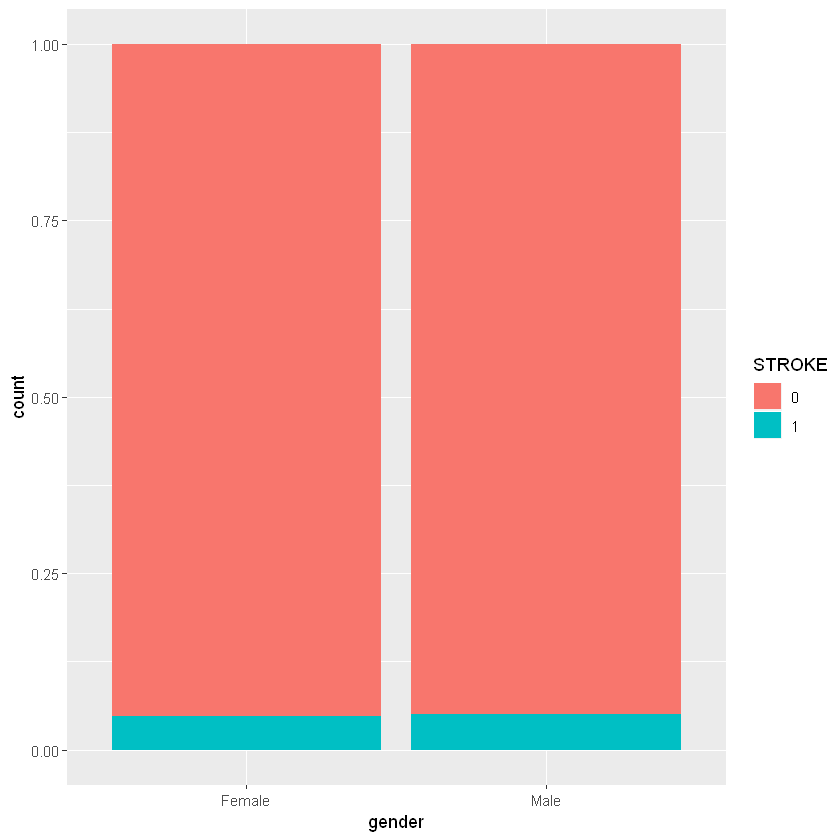

In [165]:
# check gender
data <- data %>% filter(gender != "Other")
ggplot(data, aes(x = gender, fill = as.factor(stroke))) +
  geom_bar(position = "fill") +
  labs(fill = "STROKE")

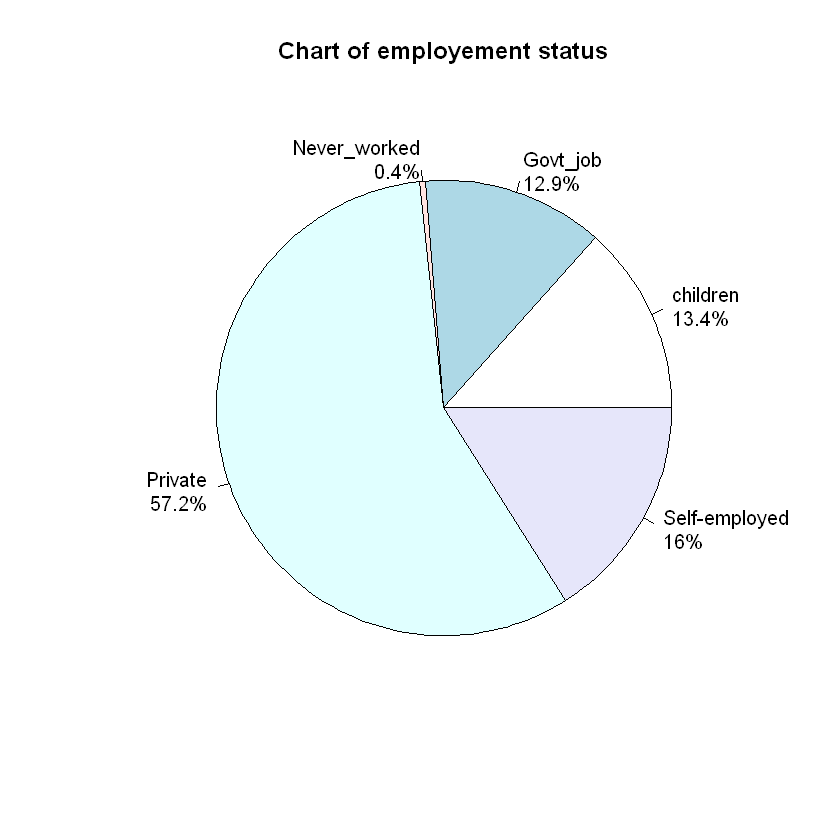

In [176]:
tab <- data$work_type %>% table()
precentages <- tab %>% prop.table() %>% round(3) * 100 
txt <- paste0(names(tab), '\n', precentages, '%') # text on chart
pie(tab, labels=txt ,main= "Chart of employement status") # plot pie chart

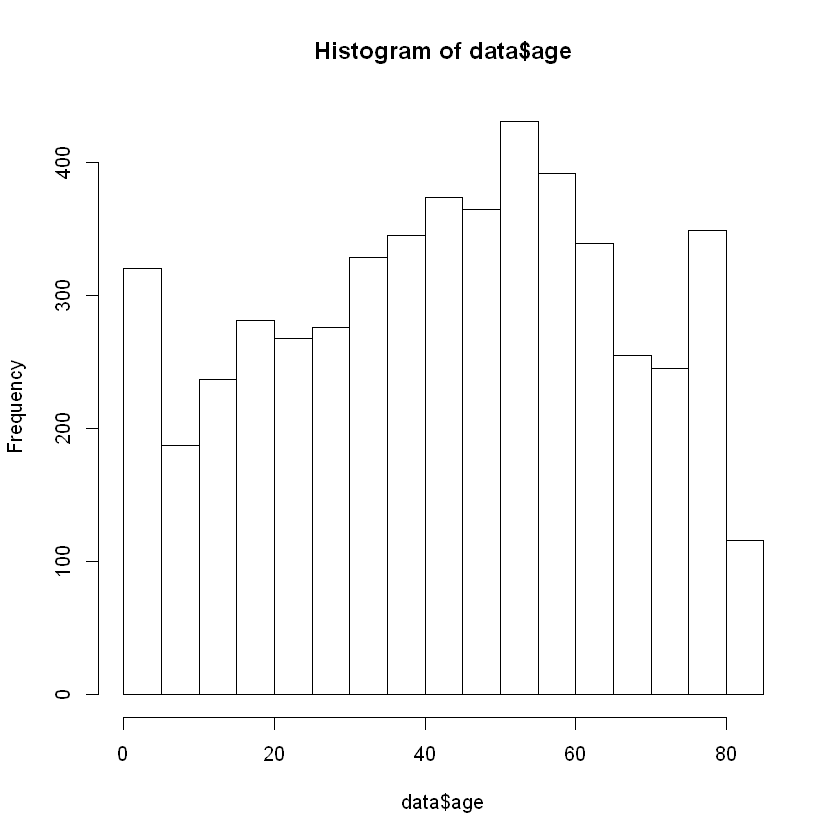

In [166]:
hist(data$age)

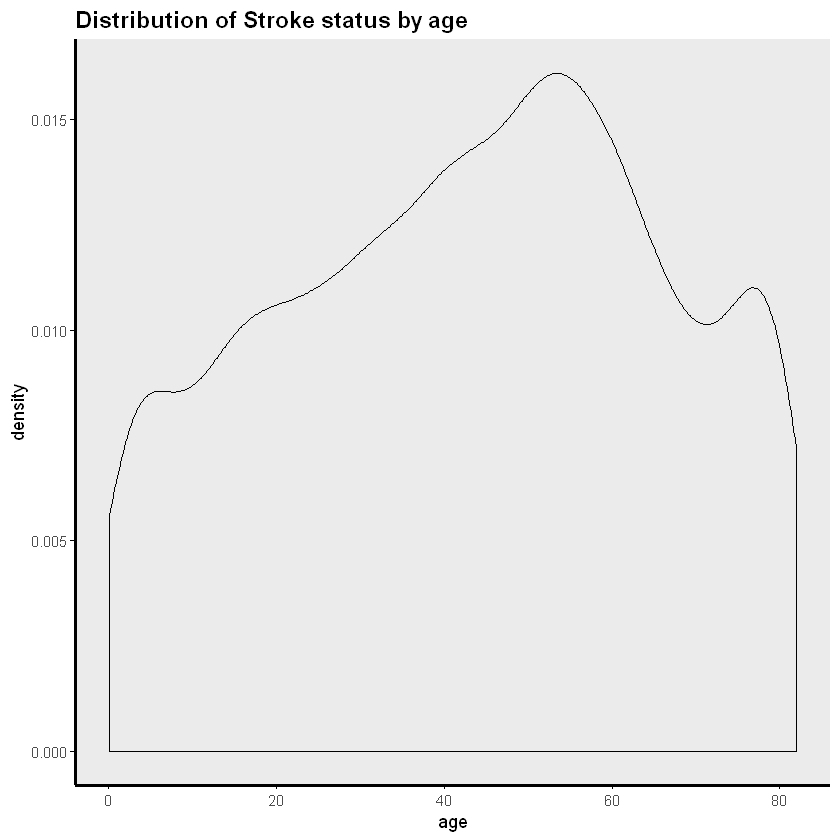

In [167]:
ggplot(data) + geom_density(mapping = aes(x = age, fill = stroke, color = stroke ), alpha =0.5 )+ 
  theme(  axis.ticks = element_blank(), panel.grid = element_blank(), ) + 
  labs(title = "Distribution of Stroke status by age") +
  theme( plot.title = element_text(size = 14, face = "bold"), axis.line = element_line(size = 1), axis.ticks = element_line() )

## Preprocessing:

In [168]:
# Change "N/A" to actual NULL
data$bmi[data$bmi=="N/A"] <-NA

In [169]:
#Checking missing values
sum(is.na(data))

[1] 201

In [170]:
#Checking duplicated rows
sum(duplicated(data))

[1] 0

In [171]:
#Converting bmi to numeric
data$bmi <- as.numeric(data$bmi)

In [172]:
#Replacing null values with the mean
data$bmi[is.na(data$bmi)]<-mean(data$bmi, na.rm = TRUE)

In [173]:
#Missing values
sum(is.na(data))

[1] 0

In [174]:
#only one column with Gender "Other" 
data[data$gender=="Other", ]

# delete it 
data = data[data$gender!="Other", ]

id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [175]:
table(data$gender)


Female   Male  Other 
  2994   2115      0 

[1] 2

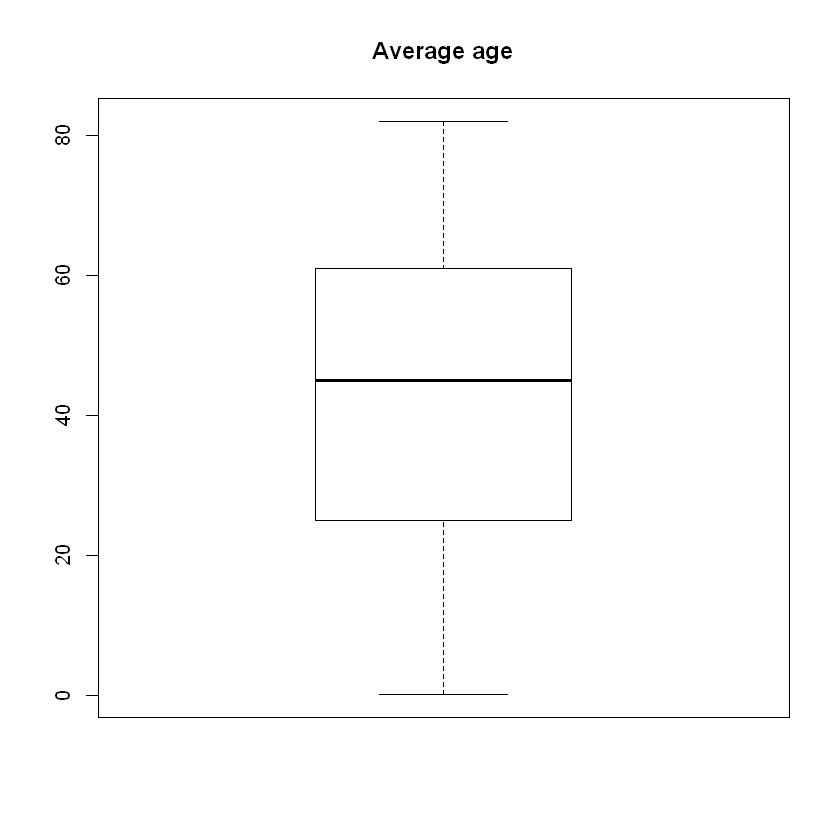

In [177]:
OutAge = outlier(data$age, logical =TRUE)
sum(OutAge)
boxplot(data$age,main="Average age")

[1] 1

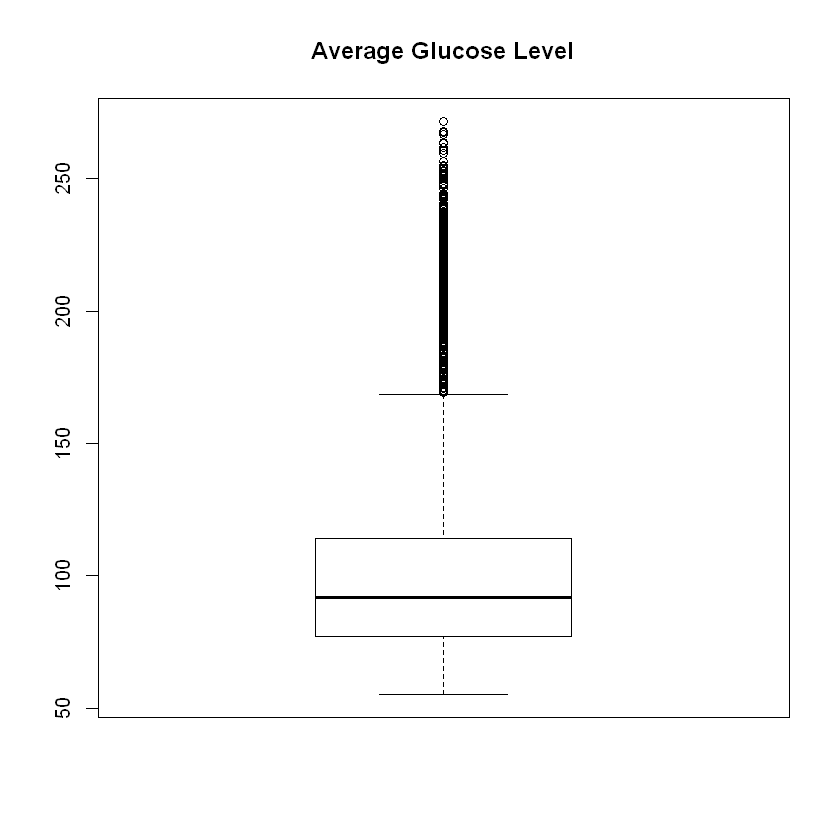

In [178]:
OutAvgGlucLevel = outlier(data$avg_glucose_level, logical =TRUE)
sum(OutAvgGlucLevel)
boxplot(data$avg_glucose_level,main="Average Glucose Level")

[1] 1

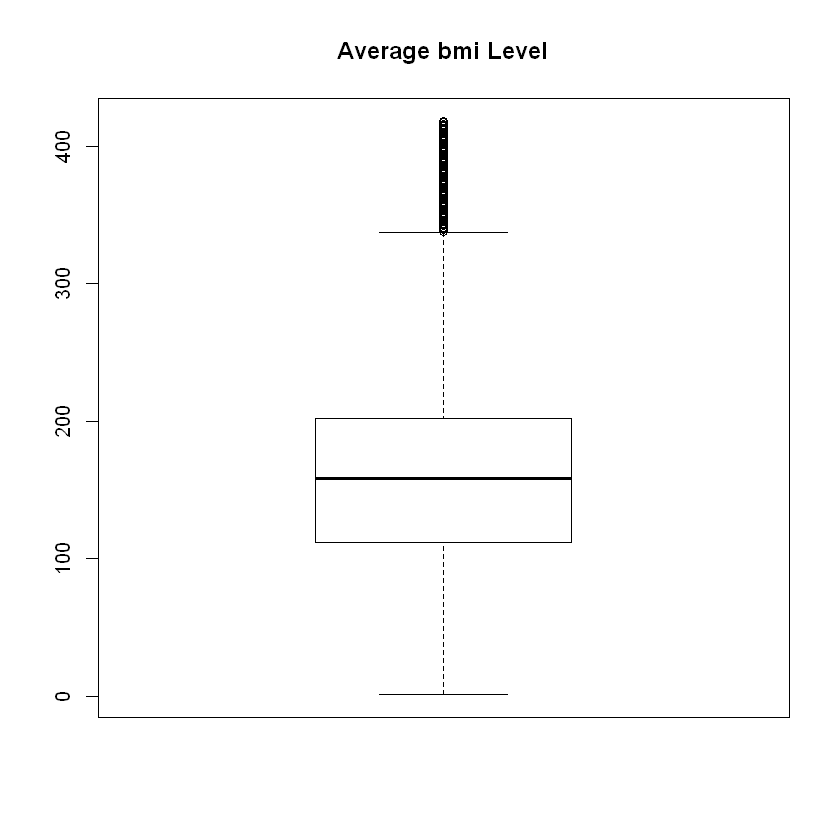

In [179]:
OutBMI = outlier(data$bmi, logical =TRUE)
sum(OutBMI)
boxplot(data$bmi,main="Average bmi Level")

## Encoding categorical data:

In [180]:
head(data)

id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
9046,Male,67,0,1,Yes,Private,Urban,228.69,240.0000,formerly smoked,1
51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,162.1021,never smoked,1
31112,Male,80,0,1,Yes,Private,Rural,105.92,199.0000,never smoked,1
60182,Female,49,0,0,Yes,Private,Urban,171.23,218.0000,smokes,1
1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,114.0000,never smoked,1
56669,Male,81,0,0,Yes,Private,Urban,186.21,164.0000,formerly smoked,1


In [181]:
data$work_type = factor(data$work_type,levels = c("Govt_job","Private", "Self-employed"
,"children","Never_worked"), labels = c(5,4,3,2,1))

In [182]:
data$gender = factor(data$gender, levels = c("Male", "Female"), labels = c(1, 2))

In [183]:
data$ever_married= factor(data$ever_married, levels = c("No", "Yes"), labels = c(0, 1))

In [184]:
data$Residence_type= factor(data$Residence_type, levels = c("Urban", "Rural"), labels = c(1, 2))

In [185]:
data$smoking_status= factor(data$smoking_status, levels = c("Unknown","never smoked", "formerly smoked","smokes"), labels = c(1,2,3,4))

In [186]:
head(data)

id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
9046,1,67,0,1,1,4,1,228.69,240.0000,3,1
51676,2,61,0,0,1,3,2,202.21,162.1021,2,1
31112,1,80,0,1,1,4,2,105.92,199.0000,2,1
60182,2,49,0,0,1,4,1,171.23,218.0000,4,1
1665,2,79,1,0,1,3,2,174.12,114.0000,2,1
56669,1,81,0,0,1,4,1,186.21,164.0000,3,1


 ## Normalize Data using Min-Max Scaling:
 